In [9]:
def count(file_name,word_list):
    word_dict = dict(zip(word_list,[0] * len(word_list)))
    with open(file_name,encoding="UTF-8") as fp1:
        lines = fp1.readlines()
        for ln in lines:
            ln.strip()
            for ch in ln:
                if ch in word_dict:
                    word_dict[ch] += 1
    return word_dict

def normalize(word_count):
    freq = dict(zip(list(word_count.keys()),[0] * len(word_count)))
    freq_sum = sum(list(word_count.values()))
    # print(freq_sum)
    for k,v in word_count.items():
        freq[k] = v/freq_sum
        if v == 0:
            freq[k] = 1e-9
    return freq
    
word_list = ["之", "其", "或", "亦", "方", "于", "即", "皆",
             "因", "仍", "故", "尚", "呢", "了", "的", "着",
             "一", "不", "乃", "呀", "吗", "咧", "啊", "把",
             "让", "向", "往", "是", "在", "越", "再", "更",
             "比", "很", "偏", "别", "好", "可", "便", "就",
             "但", "儿", "又", "也", "都", "要", "这", "那",
             "你", "我", "他", "来", "去", "道", "笑", "说"]
# 统计词频
count_list = []
for i in range(3):
    count_list.append(count("p"+str(i+1)+".txt",word_list))
    print(count_list[i])
    
# 词频归一化
freq_list = []
for i in range(3):
    freq_list.append(normalize(count_list[i]))
    print(freq_list[i])
    

{'也': 1721, '来': 3510, '的': 4452, '你': 2244, '越': 122, '故': 202, '笑': 1427, '呀': 12, '咧': 3, '便': 1166, '即': 72, '都': 823, '在': 1215, '于': 235, '要': 757, '好': 1158, '道': 3643, '让': 122, '是': 2797, '吗': 0, '皆': 155, '儿': 1759, '其': 212, '了': 6176, '那': 1485, '把': 336, '可': 690, '别': 439, '往': 308, '更': 166, '因': 722, '亦': 194, '啊': 2, '再': 421, '仍': 73, '或': 208, '方': 472, '就': 1050, '着': 1756, '尚': 73, '一': 3879, '向': 235, '不': 4465, '去': 1812, '他': 2245, '说': 2813, '乃': 97, '又': 1578, '很': 49, '偏': 117, '但': 106, '这': 2363, '比': 185, '呢': 593, '之': 896, '我': 2828}
{'也': 2327, '来': 3944, '的': 5688, '你': 2852, '越': 158, '故': 193, '笑': 1919, '呀': 8, '咧': 2, '便': 1414, '即': 58, '都': 1055, '在': 1276, '于': 213, '要': 997, '好': 1396, '道': 3610, '让': 128, '是': 3555, '吗': 3, '皆': 224, '儿': 2233, '其': 149, '了': 7975, '那': 1434, '把': 370, '可': 698, '别': 514, '往': 309, '更': 188, '因': 829, '亦': 154, '啊': 5, '再': 503, '仍': 95, '或': 229, '方': 509, '就': 1208, '着': 2008, '尚': 72, '一': 4739, '向': 218, '

In [10]:
a = sorted(count_list[0].items(),key=lambda x:x[1],reverse=True)
b = sorted(freq_list[0].items(),key=lambda x:x[1],reverse=True)
for k,v in a:
    print("%s : %d"%(k,v))
for k,v in b:
    print("%s : %f"%(k,v))

了 : 6176
不 : 4465
的 : 4452
一 : 3879
道 : 3643
来 : 3510
我 : 2828
说 : 2813
是 : 2797
这 : 2363
他 : 2245
你 : 2244
去 : 1812
儿 : 1759
着 : 1756
也 : 1721
又 : 1578
那 : 1485
笑 : 1427
在 : 1215
便 : 1166
好 : 1158
就 : 1050
之 : 896
都 : 823
要 : 757
因 : 722
可 : 690
呢 : 593
方 : 472
别 : 439
再 : 421
把 : 336
往 : 308
于 : 235
向 : 235
其 : 212
或 : 208
故 : 202
亦 : 194
比 : 185
更 : 166
皆 : 155
越 : 122
让 : 122
偏 : 117
但 : 106
乃 : 97
仍 : 73
尚 : 73
即 : 72
很 : 49
呀 : 12
咧 : 3
啊 : 2
吗 : 0
了 : 0.092678
不 : 0.067003
的 : 0.066808
一 : 0.058209
道 : 0.054668
来 : 0.052672
我 : 0.042438
说 : 0.042213
是 : 0.041972
这 : 0.035460
他 : 0.033689
你 : 0.033674
去 : 0.027191
儿 : 0.026396
着 : 0.026351
也 : 0.025826
又 : 0.023680
那 : 0.022284
笑 : 0.021414
在 : 0.018233
便 : 0.017497
好 : 0.017377
就 : 0.015757
之 : 0.013446
都 : 0.012350
要 : 0.011360
因 : 0.010834
可 : 0.010354
呢 : 0.008899
方 : 0.007083
别 : 0.006588
再 : 0.006318
把 : 0.005042
往 : 0.004622
于 : 0.003526
向 : 0.003526
其 : 0.003181
或 : 0.003121
故 : 0.003031
亦 : 0.002911
比 : 0.002776
更 : 0.00

In [11]:
import math
# 计算KL距离
def compute_KL_distance(p,q,word_list):
    distance = 0
    for w in word_list:
        distance += p[w] * math.log(p[w]/q[w],2)
        
    return distance

# 计算对称距离
def compute_sym_distance(p,q,word_list):
    distance = 0
    kld1 = compute_KL_distance(p,q,word_list)
    kld2 = compute_KL_distance(q,p,word_list)
    
    return (kld1+kld2)/2
    
# 计算归一化距离
def compute_distance(freq_list):
    length = len(freq_list)
    
    kld_matrix = [[0 for i in range(length)] for j in range(length)]
    smd_matrix = [[0 for i in range(length)] for j in range(length)]
    nmd_matrix = [[0 for i in range(length)] for j in range(length)]
    
    kld_sum = 0
    for p in range(len(freq_list)):
        for q in range(p,len(freq_list)):
            klpq = compute_KL_distance(freq_list[p],freq_list[q],word_list)
            klqp = compute_KL_distance(freq_list[q],freq_list[p],word_list)
            kld_matrix[p][q] = klpq
            kld_matrix[q][p] = klqp
            
            kld_2avg = (klpq + klqp)/2
            smd_matrix[p][q] = smd_matrix[q][p] = kld_2avg
            
            kld_sum += klpq + klqp
    
    kld_total_avg = kld_sum/(length*length)
    for i in range(length):
        for j in range(length):
            if kld_matrix[i][j] >= kld_total_avg:
                nmd_matrix[i][j] = 1
            else:
                nmd_matrix[j][i] = 0
            
    return kld_matrix,smd_matrix,nmd_matrix

kld,smd,nmd = compute_distance(freq_list)
# print(kld,smd,nmd)

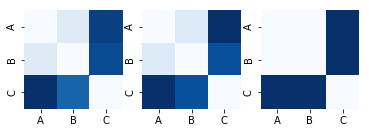

In [12]:
5
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Display matrix
# plt.figure(figsize=(8,8), dpi=80)
# plt.figure(1)
# ax1 = plt.subplot(131)
# ax1.matshow(kld)
# ax2 = plt.subplot(132)
# ax2.matshow(smd)
# ax3 = plt.subplot(133)
# ax3.matshow(nmd)
ticklabels = ['A','B','C']
f = plt.figure()
f.add_subplot(1,3,1)
sns.heatmap(kld,cmap='Blues',fmt=".2f",square=True,xticklabels=ticklabels,yticklabels=ticklabels,cbar=False)
f.add_subplot(1,3,2)
sns.heatmap(smd,cmap='Blues',fmt=".2f",square=True,xticklabels=ticklabels,yticklabels=ticklabels,cbar=False)
f.add_subplot(1,3,3)
sns.heatmap(nmd,cmap='Blues',fmt=".2f",square=True,xticklabels=ticklabels,yticklabels=ticklabels,cbar=False)
plt.show()



<Figure size 720x720 with 0 Axes>

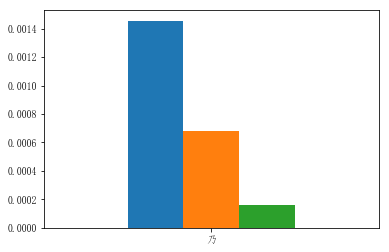

In [35]:
import matplotlib as mpl
import pylab as pl
import pandas as pd
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
# word_freq = dict(zip(word_list,[0.0,0.0,0.0]*len(word_list)))
word_freq = {}
j = 0
# for w in word_list:
#     fl = []
#     for i in range(len(freq_list)):
#         fl.append(freq_list[i][w])
#     word_freq[w] = fl
#     j+=1
#     if j > 8:
#         break
w = "乃"
fl = []
for i in range(len(freq_list)):

    fl.append(freq_list[i][w])
word_freq[w] = fl
df = pd.DataFrame(word_freq)
df = df.T
ax = df.plot(kind='bar',legend=False)
pl.xticks(rotation=360)
fig = ax.get_figure()
fig.savefig('fig.svg')